## English Wikipedia page views, 2008 - 2017

This notebook demostrates how to fetch data for Wikipedia page views. The notebook structured into 3 different section with sub-section to highlight different processes:
## Contents
  
[1. Dataset acquisition](#1)      
&thinsp;&thinsp;&thinsp;&thinsp; [1.1 Legacy Pagecounts API](#1.1)    
&thinsp;&thinsp;&thinsp;&thinsp; [1.2 Pageview API](#1.2)  

[2.Data pre-processing](#2)  

[3.Visualization](#3)     

In [1]:
import requests
import pandas as pd
import json
import glob
import os
import matplotlib.pyplot as plt
import datetime

<br>
<a id="1">1. Dataset acquisition</a>

This step involves using two different Wikimedia API endpoints for two different date ranges:

    1)Legacy Pagecounts API - Provides access to desktop and mobile traffic data from December 2007 through July 2016.
    
    2)Pageviews API - Provides access to desktop, mobile web, and mobile app traffic data from July 2015 through last month.

In [2]:
#define two endpoints of API to fetch data from.

endpoint_legacy = 'https://wikimedia.org/api/rest_v1/metrics/legacy/pagecounts/aggregate/{project}/{access}/{granularity}/{start}/{end}'
endpoint_pageview = 'https://wikimedia.org/api/rest_v1/metrics/pageviews/aggregate/{project}/{access}/{agent}/{granularity}/{start}/{end}'

headers={'User-Agent' : 'https://github.com/pshivraj', 'From' : 'pshivraj@uw.edu'}

#define a dict with similar params for both API.
global_params = {'project' : 'en.wikipedia.org',
            'granularity' : 'monthly',
         }
#make data folder
!mkdir data

mkdir: cannot create directory ‘data’: File exists


In [3]:
def page_count_api(data_type,access, start, end):
    """
        Utility function to write json files
        : param data_type: type of API to use.
                access: nature of traffic data.
                start: start date
                end: end date
        : outputs json files
    """
    params = {
        "access" : access,
        "start" : start,
        "end" : end
    }
    params.update(global_params)
    if data_type == 'pagecounts':
        endpoint = endpoint_legacy
    elif data_type == 'pageviews': # conditional statement to add extra agent header for pageviews api.
        endpoint = endpoint_pageview
        params_agent = {
            "agent" : 'user'
        }
        params.update(params_agent)
    print(params)
    api_request = requests.get(endpoint.format(**params),headers=headers)
    file_name = "{}_{}_{}_{}.json".format(data_type, access, start, end)
    data = api_request.json()
    with open('data/' + file_name, 'w') as outfile:
        json.dump(data, outfile)

<br>
<a id="1.1">1.1 Legacy Pagecounts API</a>

This API endpoint would let us fetch data from December 2007 till July 2016.
we'll fetch data for:

    1)desktop-site
    2)mobile-site

In [4]:
# declaring variables for pagecount api and writing data to local data folder.
start_legacy, end_legacy = '2007120100', '2016080100'
page_count_api('pagecounts','desktop-site', start_legacy, end_legacy)
page_count_api('pagecounts','mobile-site', start_legacy, end_legacy)

{'access': 'desktop-site', 'start': '2007120100', 'end': '2016080100', 'project': 'en.wikipedia.org', 'granularity': 'monthly'}
{'access': 'mobile-site', 'start': '2007120100', 'end': '2016080100', 'project': 'en.wikipedia.org', 'granularity': 'monthly'}


<br>
<a id="1.2">1.2 Pageview API</a>

This API endpoint would let us fetch data from July 2015 through September 2018.
we'll fetch data for:

    1)desktop
    2)mobile-app
    3)mobile-web

In [5]:
# declaring variables for pageview api and writing data to local data folder.
start_pageview, end_pageview = '2015070100', '2018100100'
page_count_api('pageviews','desktop', start_pageview, end_pageview)
page_count_api('pageviews','mobile-app', start_pageview, end_pageview)
page_count_api('pageviews','mobile-web', start_pageview, end_pageview)

{'access': 'desktop', 'start': '2015070100', 'end': '2018100100', 'project': 'en.wikipedia.org', 'granularity': 'monthly', 'agent': 'user'}
{'access': 'mobile-app', 'start': '2015070100', 'end': '2018100100', 'project': 'en.wikipedia.org', 'granularity': 'monthly', 'agent': 'user'}
{'access': 'mobile-web', 'start': '2015070100', 'end': '2018100100', 'project': 'en.wikipedia.org', 'granularity': 'monthly', 'agent': 'user'}


<br>
<a id="2">2. Data pre-processing</a>

In [6]:
# read all json files obtained from the pagecount and pageview api.
json_files = glob.glob(os.getcwd() + "/data/*.json")
data = []
filenames = []
for files in json_files:
    with open(files, "r") as f:
        file = "{}".format(files.split('/')[-1])
        filenames.append(file)
        data.append(json.loads(f.read()))

In [7]:

def get_dataframe(data_type, json_path):
    """
        Utility function to write json files
        : param data_type: type of API data from pageview or pagecount API.
                json_path: file path of json to read.
        : return pandas Dataframe
    """
    year = []
    month = []
    api_data = []
    with open('data/' + json_path) as file:    
        data = json.load(file)
    for data_val in data['items']:
        year.append(str(data_val['timestamp'])[:4])  # strip year from the string
        month.append(str(data_val['timestamp'])[4:6])  # strip month from the string
        if data_type.startswith('pagecounts'):
            api_data.append(data_val['count'])
        elif data_type.startswith('pageviews'):
            api_data.append(data_val['views'])
    return pd.DataFrame({'year': year,
                         'month': month,
                         data_type: api_data
                        })

# reading all json files into dataframe.
pagecounts_desktop = get_dataframe('pagecounts_desktop', 'pagecounts_desktop-site_2007120100_2016080100.json')
pagecounts_mobile_site = get_dataframe('pagecounts_mobile_site', 'pagecounts_mobile-site_2007120100_2016080100.json')
pageviews_desktop = get_dataframe('pageviews_desktop', 'pageviews_desktop_2015070100_2018100100.json')
pageviews_mobile_app = get_dataframe('pageviews_mobile_app', 'pageviews_mobile-app_2015070100_2018100100.json')
pageviews_mobile_web = get_dataframe('pageviews_mobile_web', 'pageviews_mobile-web_2015070100_2018100100.json')

In [8]:
#generating single pandas dataframe for pageview api data.
pageviews_mobile = pd.merge(pageviews_mobile_app, pageviews_mobile_web, on=['year', 'month'])
pageviews_mobile['pageview_mobile_views'] = pageviews_mobile['pageviews_mobile_app'] + pageviews_mobile['pageviews_mobile_web']

pageviews = pd.merge(pageviews_mobile, pageviews_desktop, on=['year', 'month'], how='outer')

pageviews['pageview_all_views'] = pageviews['pageviews_desktop'] + pageviews['pageview_mobile_views']
pageviews = pageviews.drop(['pageviews_mobile_app', 'pageviews_mobile_web'], axis=1)
pageviews.head(5)

,year,month,pageview_mobile_views,pageviews_desktop,pageview_all_views
0,2015,07,3288755294,4376666686,7665421980
1,2015,08,3302333038,4332482183,7634815221
2,2015,09,3170203333,4485491704,7655695037
3,2015,10,3268499132,4477532755,7746031887
4,2015,11,3236601070,4287720220,7524321290


In [9]:
#generating single pandas dataframe for pagecount api data.
pagecounts = pd.merge(pagecounts_desktop, pagecounts_mobile_site, on=['year', 'month'], how='outer')

pagecounts['pagecount_all_views'] = pagecounts['pagecounts_desktop'] + pagecounts['pagecounts_mobile_site']
pagecounts.head(5)

,year,month,pagecounts_desktop,pagecounts_mobile_site,pagecount_all_views
0,2007,12,2998331524,NaN,NaN
1,2008,01,4930902570,NaN,NaN
2,2008,02,4818393763,NaN,NaN
3,2008,03,4955405809,NaN,NaN
4,2008,04,5159162183,NaN,NaN


In [10]:
# generating single data frame for both pagecount and pageview api.
df = pd.merge(pageviews,
              pagecounts,
              on=['year', 'month'], how='outer')
# fill nan with zeroes
df = df.fillna(0)
df.columns = ['year', 'month', 'pageview_desktop_views','pageview_mobile_views','pageview_all_views','pagecount_desktop_views',
              'pagecount_mobile_views', 'pagecount_all_views']
df.head(5)

,year,month,pageview_desktop_views,pageview_mobile_views,pageview_all_views,pagecount_desktop_views,pagecount_mobile_views,pagecount_all_views
0,2015,07,3.288755e+09,4.376667e+09,7.665422e+09,5.229226e+09,3.254473e+09,8.483699e+09
1,2015,08,3.302333e+09,4.332482e+09,7.634815e+09,5.035534e+09,3.268488e+09,8.304022e+09
2,2015,09,3.170203e+09,4.485492e+09,7.655695e+09,5.409631e+09,3.172430e+09,8.582061e+09
3,2015,10,3.268499e+09,4.477533e+09,7.746032e+09,5.535704e+09,3.246083e+09,8.781787e+09
4,2015,11,3.236601e+09,4.287720e+09,7.524321e+09,5.296956e+09,3.218235e+09,8.515191e+09


In [11]:
# write dataframe to csv locally in data folder.
df.to_csv('data/en-wikipedia_traffic_200801-201709.csv', index=False)

<br>
<a id="3">3. Visualization</a>

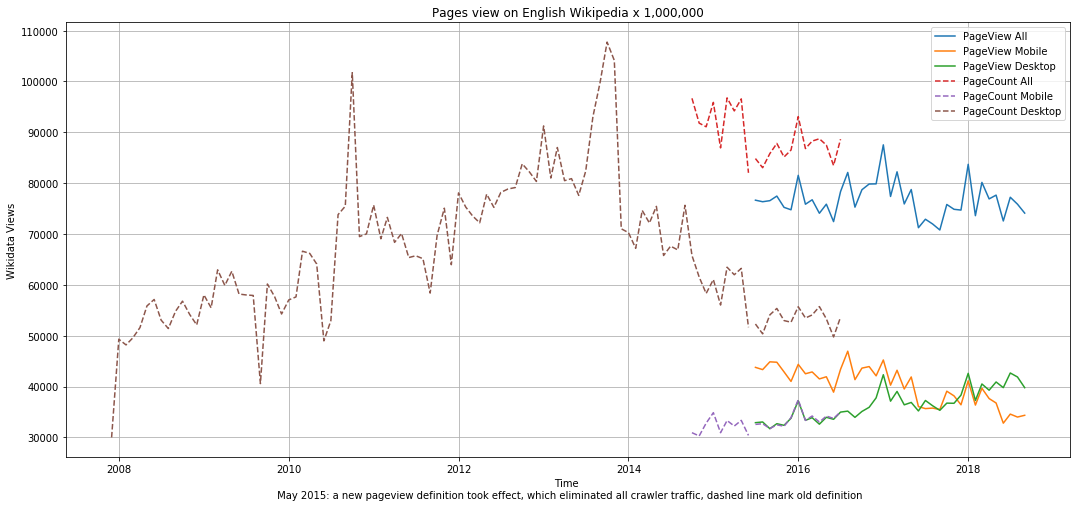

In [15]:
# reading the csv data generated and plotting respective columns with legends.
df = pd.read_csv('data/en-wikipedia_traffic_200801-201709.csv')
plt.figure(figsize=(18, 8))

df['date'] = df.apply(lambda x:datetime.datetime(int(x['year']), int(x['month']), 1), axis=1) # generate date 
df = df.replace(0, pd.np.nan) # convert zero values to NAN to exclude them from plots.

plt.plot(df.date, df.pageview_all_views/100000)
plt.plot(df.date, df.pageview_mobile_views/100000)
plt.plot(df.date, df.pageview_desktop_views/100000)

plt.plot(df.date, df.pagecount_all_views/100000,'--')
plt.plot(df.date, df.pagecount_mobile_views/100000, '--')
plt.plot(df.date, df.pagecount_desktop_views/100000,'--')

plt.legend(["PageView All", "PageView Mobile", "PageView Desktop", "PageCount All", "PageCount Mobile", "PageCount Desktop"])


plt.xlabel("Time \n May 2015: a new pageview definition took effect, which eliminated all crawler traffic, dashed line mark old definition")
plt.ylabel("Wikidata Views")

plt.title('Pages view on English Wikipedia x 1,000,000')
plt.grid()
plt.savefig('wiki_2007-2018_views.png')